<a href="https://colab.research.google.com/github/liping1005/projects/blob/main/HousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
#basic libraries
import pandas as pd
import numpy as np

#plotting and preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge

#classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#clustering
from sklearn.cluster import KMeans

#regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#torch








# Data Explanation

what is the dataset about?  House location and population and households and income affecting California houding value.

This dataset focuses on housing prices in California. We are given data about blocks throughout the state of California. Using this information, we'll try to predict the median house value in each block. Here are the features of our data:
* Longitude: the measurement east or west of the prime meridian.
* Latitude: the angular distance of a place north or south of the earth's equator.
* Median House Age: the median of house age in a block.
* Total Rooms: number of rooms in a block.
* Total Bedrooms: number of bedrooms in a block.
* Population: number of people in a block.
* Households: number of households in a block.
* Median Income: the median income of a household in a block given in units of 10000 dollars.



# Getting Train and Test Data

In [ ]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
X_train = train.drop(columns = ['median_house_value'])
y_train = np.asarray(train['median_house_value'].copy())
X_test = test.drop(columns = ['median_house_value'])
y_test = np.asarray(test['median_house_value'].copy())

# Make Predictions Using OLS, Ridge, LASSO

Let y_p be the predictions from the regression and y_t be the actual median housing prices in the neighborhood. Also assume there are $N$ samples. I will use the mean absolute error given by $\frac{1}{N}\|y_p-y_t\|$ because the metric shows the error between average median housing price and the average predicted housing price. I will use ordinary least squares, ridge regression, and lasso as a test. The results are below:

## OLS

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)
print("The mean absolute error is",np.linalg.norm(prediction-y_test,1)/len(prediction))

The mean absolute error is 50352.22825794297


## Lasso

In [ ]:
clf = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
pred_lasso = clf.predict(X_test)
print("The mean absolute error is",np.linalg.norm(pred_lasso-y_test,1)/len(pred_lasso))

The mean absolute error is 50352.21978017116


## Ridge

In [ ]:
clf = linear_model.Ridge(alpha=0.1).fit(X_train,y_train)
pred_lasso = clf.predict(X_test)
print("The mean absolute error is",np.linalg.norm(pred_lasso-y_test,1)/len(pred_lasso))

The mean absolute error is 50352.206669311265


From the results, we can see the results aren't good because the error is too big compared to the housing price. Some housing prices are nearly the same as the average absolute error. This method probably won't work, so I will explore the data more and try to find trends visually.

# EDA

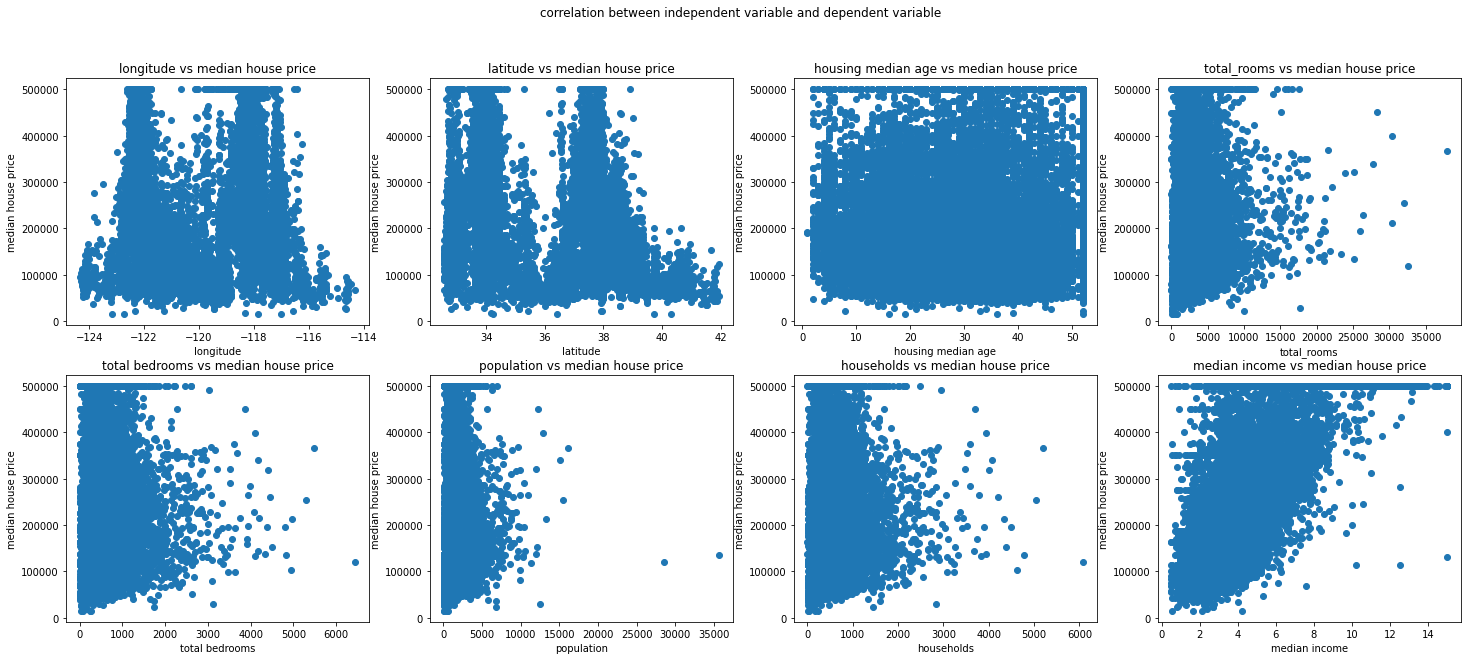

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(2,4,1)
plt.scatter(X_train['longitude'],y_train)
plt.xlabel('longitude')
plt.ylabel('median house price')
plt.title('longitude vs median house price')
plt.subplot(2,4,2)
plt.scatter(X_train['latitude'],y_train)
plt.xlabel('latitude')
plt.ylabel('median house price')
plt.title('latitude vs median house price')
plt.subplot(2,4,3)
plt.scatter(X_train['housing_median_age'],y_train)
plt.xlabel('housing median age')
plt.ylabel('median house price')
plt.title('housing median age vs median house price')
plt.subplot(2,4,4)
plt.scatter(X_train['total_rooms'],y_train)
plt.xlabel('total_rooms')
plt.ylabel('median house price')
plt.title('total_rooms vs median house price')
plt.subplot(2,4,5)
plt.scatter(X_train['total_bedrooms'],y_train)
plt.xlabel('total bedrooms')
plt.ylabel('median house price')
plt.title('total bedrooms vs median house price')
plt.subplot(2,4,6)
plt.scatter(X_train['population'],y_train)
plt.xlabel('population')
plt.ylabel('median house price')
plt.title('population vs median house price')
plt.subplot(2,4,7)
plt.scatter(X_train['households'],y_train)
plt.xlabel('households')
plt.ylabel('median house price')
plt.title('households vs median house price')
plt.subplot(2,4,8)
plt.scatter(X_train['median_income'],y_train)
plt.xlabel('median income')
plt.ylabel('median house price')
plt.title('median income vs median house price')
plt.suptitle('correlation between independent variable and dependent variable')
plt.show()

It looks like there is no correlation. However, there is something strange in the data. The housing price doesn't go over 500,000. There are definitely houses that are more expensive than 500,000 in California, so the data doesn't measure values above 500,000. There is a similar issue with the median house age. This suggests that the data isn't very representative.

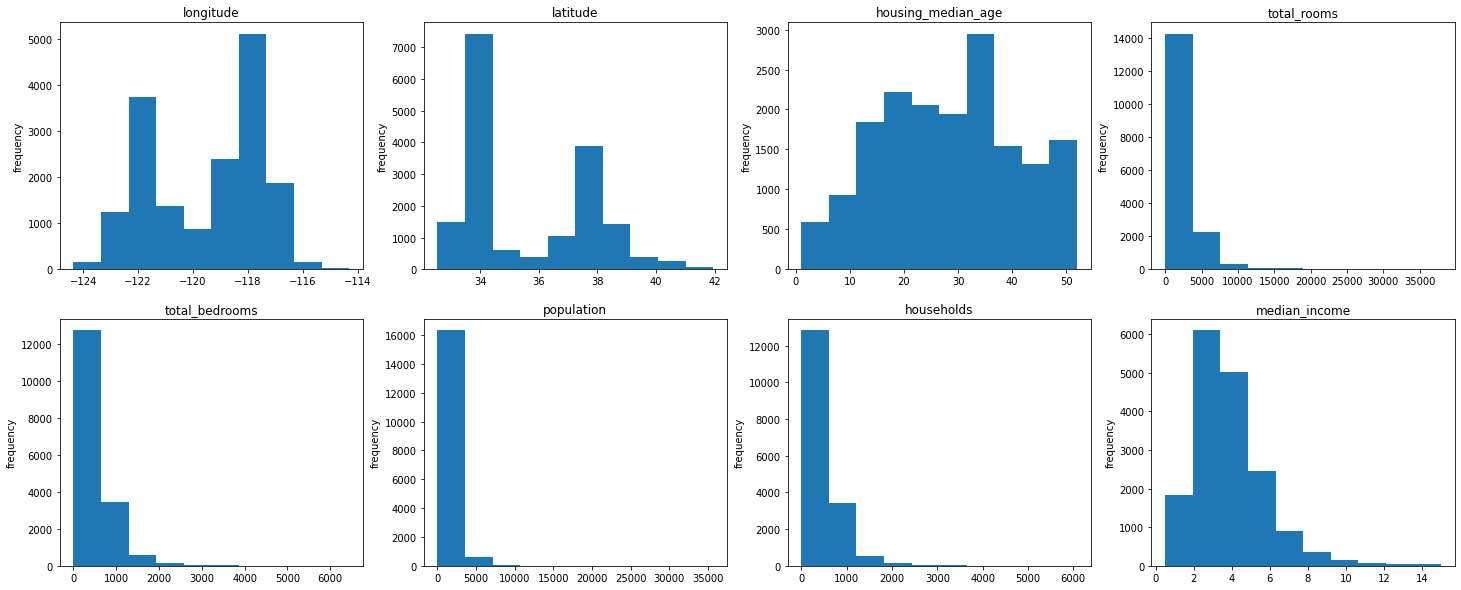

In [ ]:
plt.figure(figsize = (25,10))
X_train.columns
for i in range(len(X_train.columns)):
    plt.subplot(2,4,i+1)
    plt.hist(X_train[X_train.columns[i]])
    plt.ylabel('frequency')
    plt.title(X_train.columns[i])

Total price, total bedrooms population, households look like having exponential distribution. All other variables look like having a normal distribution with one or two peaks

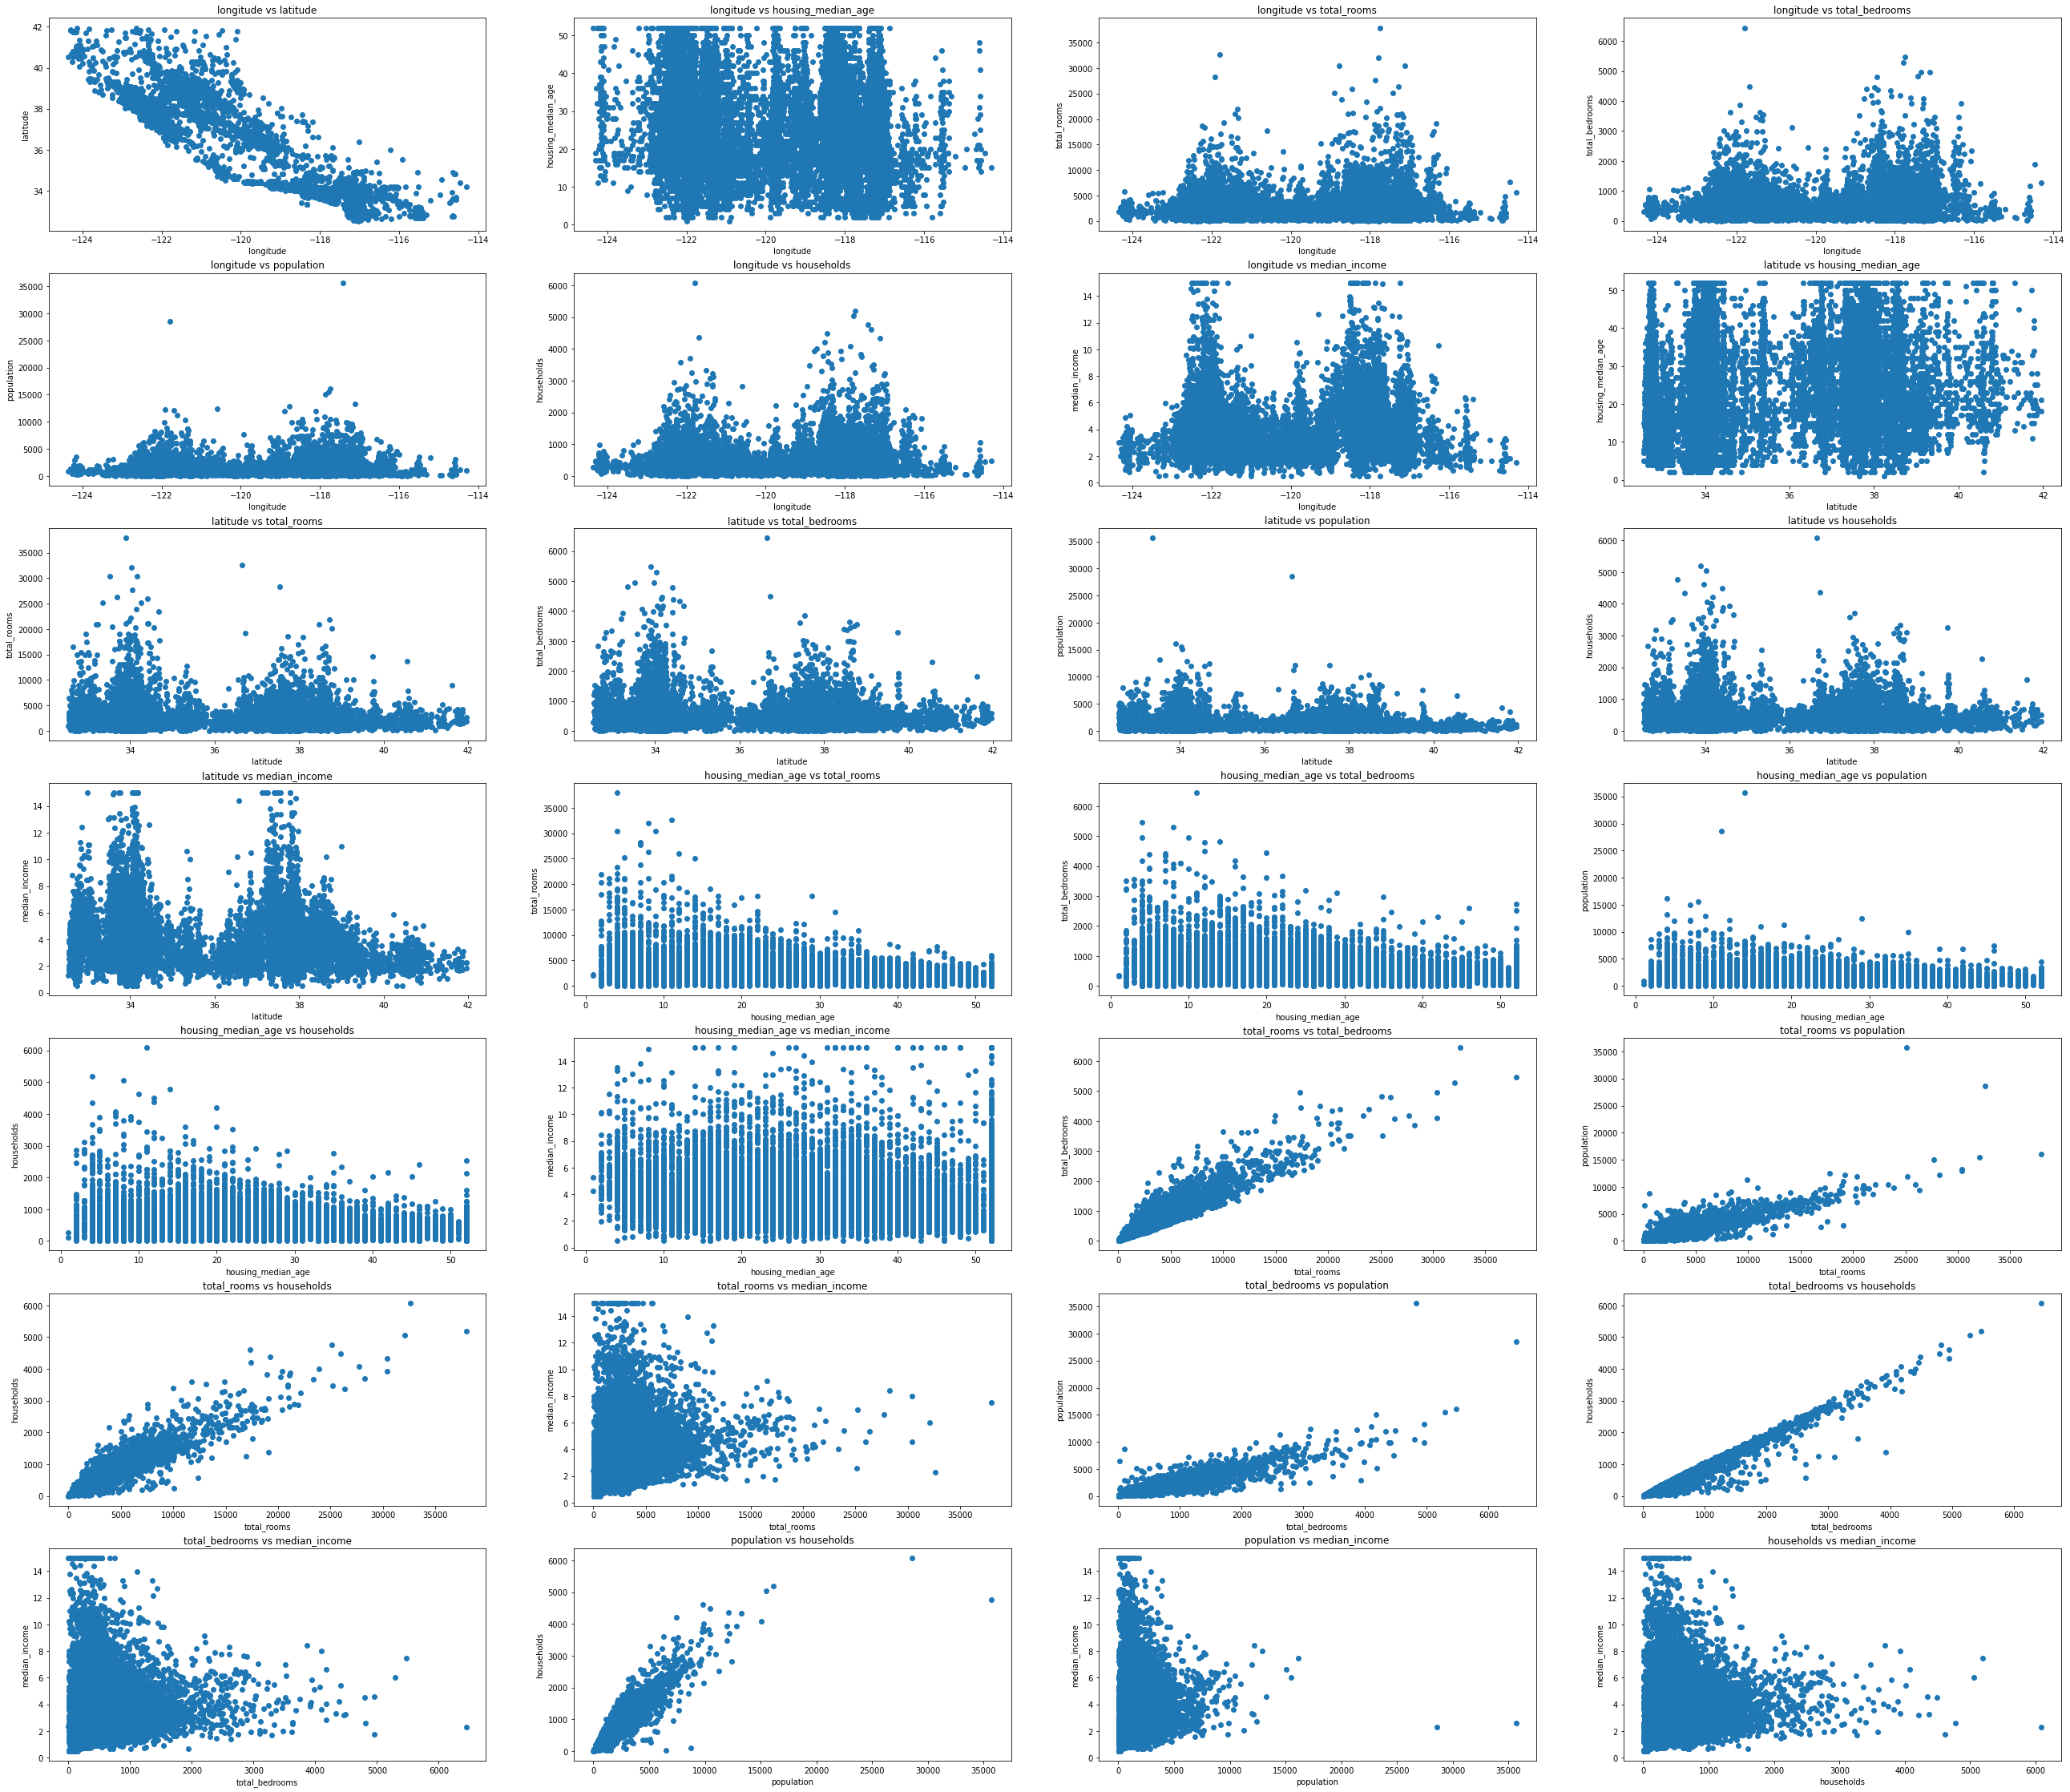

In [ ]:
plt.figure(figsize = (45,40))
count = 1
for i in range(len(X_train.columns)):
  for j in range(i+1,len(X_train.columns)):
    plt.subplot(7,4,count)
    plt.scatter(X_train[X_train.columns[i]],X_train[X_train.columns[j]])
    plt.xlabel(X_train.columns[i])
    plt.ylabel(X_train.columns[j])
    plt.title('{0} vs {1}'.format(X_train.columns[i], X_train.columns[j]))
    count +=1

The following variables seem to have some correlation:
* longitude and latitude
* total_rooms and total_bedrooms
* total_rooms and population
* total_rooms and households
* total_bedrooms and population
* total_bedrooms and households
* population and households 

All other variables do not seem to have any correlation. 

There are a few choices here. We can make new features from the old features to see if this reduces correlation. It's also possible to decorrelate features using gram-schmidt orthogonalization. Lastly, selecting features form data is a good idea.

# Feature Engineer

Let's try to do some feature engineering. Some of the features by themselves don't necessarily make too much sense.

In [ ]:
train['room_per_house'] = train['total_rooms']/train['households']
train['bedroom_per_house'] =  train['total_bedrooms']/train['households']
train['people_per_house'] =  train['population']/train['households']
train = train.drop(columns = ['total_rooms', 'total_bedrooms', 'population'])

#move median_house_value to end of df
placeholder = train['median_house_value']
train.pop('median_house_value')
train['median_house_value'] = placeholder
train.head()

,longitude,latitude,housing_median_age,households,median_income,room_per_house,bedroom_per_house,people_per_house,median_house_value
0,-114.31,34.19,15.0,472.0,1.4936,11.889831,2.718220,2.150424,66900.0
1,-114.47,34.40,19.0,463.0,1.8200,16.522678,4.105832,2.438445,80100.0
2,-114.56,33.69,17.0,117.0,1.6509,6.153846,1.487179,2.846154,85700.0
3,-114.57,33.64,14.0,226.0,3.1917,6.641593,1.491150,2.278761,73400.0
4,-114.57,33.57,20.0,262.0,1.9250,5.549618,1.244275,2.381679,65500.0


In [ ]:
test['room_per_house'] = test['total_rooms']/test['households']
test['bedroom_per_house'] =  test['total_bedrooms']/test['households']
test['people_per_house'] =  test['population']/test['households']
test = test.drop(columns = ['total_rooms', 'total_bedrooms', 'population'])

#move median_house_value to end of df
placeholder = test['median_house_value']
test.pop('median_house_value')
test['median_house_value'] = placeholder
test.head()

,longitude,latitude,housing_median_age,households,median_income,room_per_house,bedroom_per_house,people_per_house,median_house_value
0,-122.05,37.37,27.0,606.0,6.6085,6.410891,1.090759,2.536304,344700.0
1,-118.30,34.26,43.0,277.0,3.5990,5.451264,1.119134,2.920578,176500.0
2,-117.81,33.78,27.0,495.0,5.7934,7.250505,1.024242,2.997980,270500.0
3,-118.36,33.82,28.0,11.0,6.1359,6.090909,1.363636,4.454545,330000.0
4,-119.67,36.33,19.0,237.0,2.9375,5.236287,1.029536,3.586498,81700.0


Here is the correlation plots after the feature engineering:

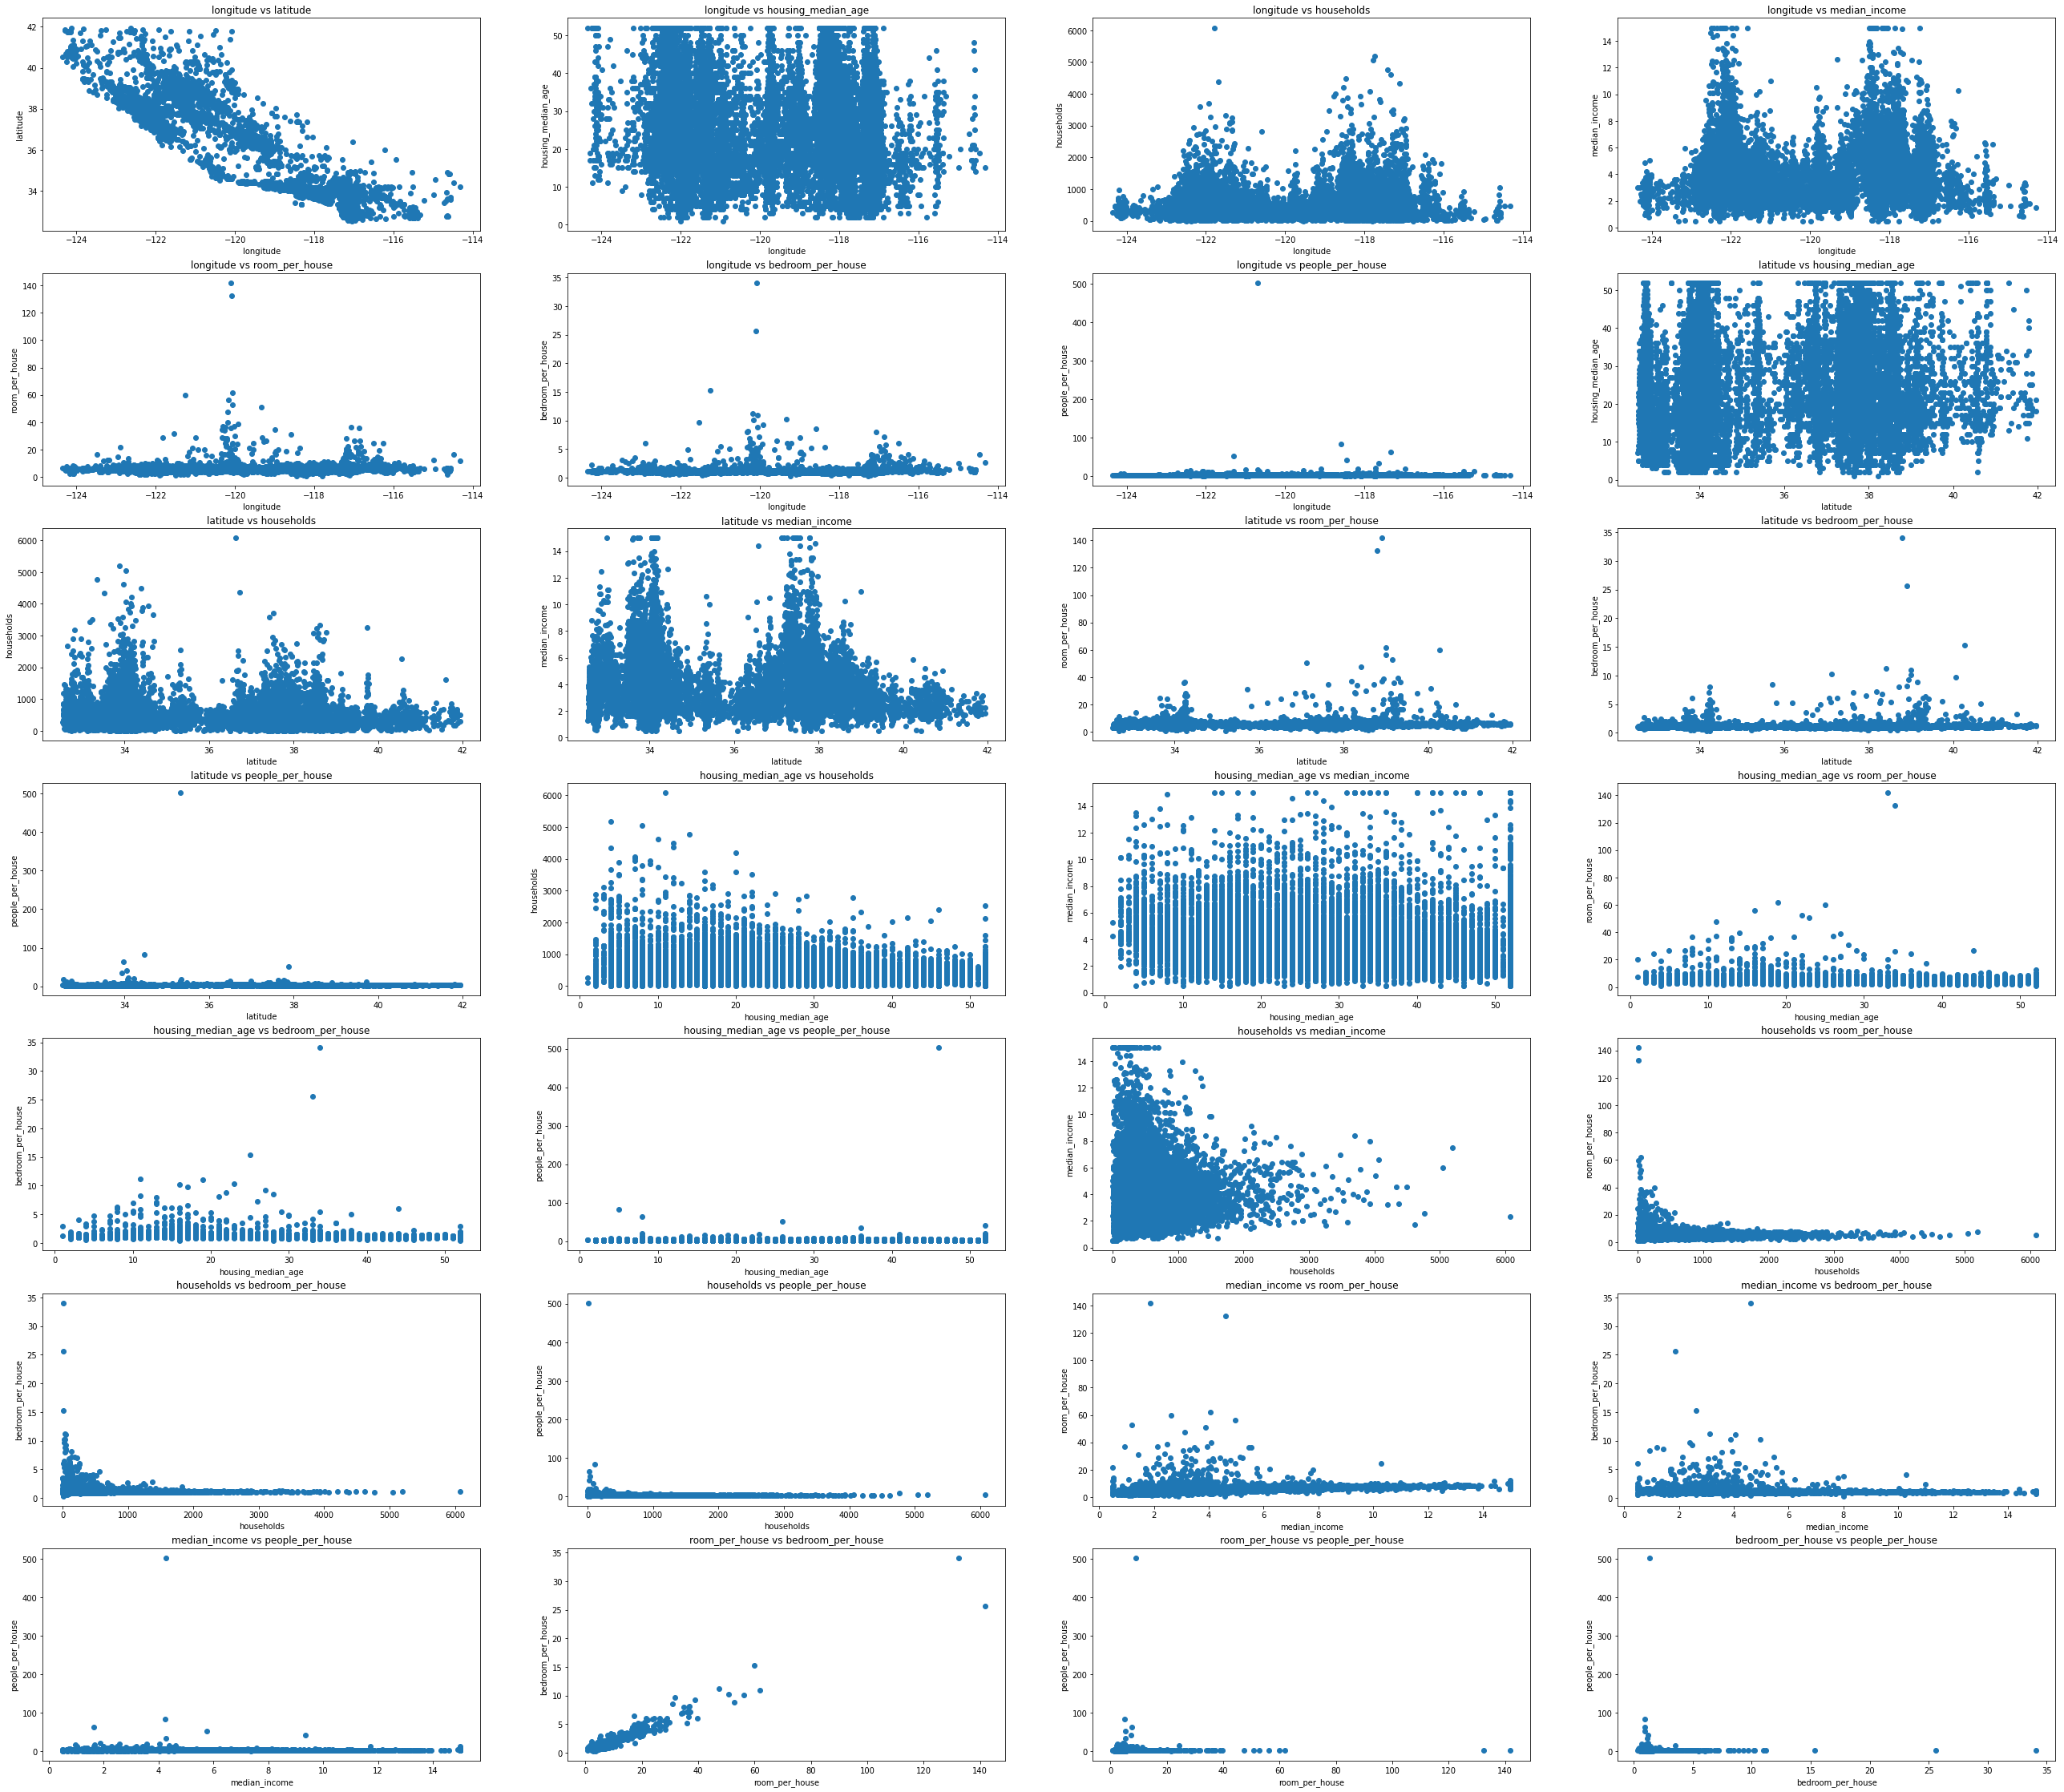

In [ ]:
plt.figure(figsize = (45,40))
count = 1
for i in range(len(train.columns)-1):
  for j in range(i+1,len(train.columns)-1):
    plt.subplot(7,4,count)
    plt.scatter(train[train.columns[i]],train[train.columns[j]])
    plt.xlabel(train.columns[i])
    plt.ylabel(train.columns[j])
    plt.title('{0} vs {1}'.format(train.columns[i], train.columns[j]))
    count +=1

It looks like there are some outliers in the data. We can remove these using Python. Then we will check the correlation again.

# Remove Outliers

In [ ]:
for i in range(len(train.columns)-1):
    highest = train[train.columns[i]].mean() + 3*train[train.columns[i]].std()
    lowest = train[train.columns[i]].mean() - 3*train[train.columns[i]].std()
    train[train.columns[i]] = train[train.columns[i]][(train[train.columns[i]] > lowest) & (train[train.columns[i]] < highest)]
train = train.dropna(axis = 0)


In [ ]:
X_train = train.drop(columns = ['median_house_value'])
y_train = np.asarray(train['median_house_value'].copy())
X_test = test.drop(columns = ['median_house_value'])
y_test = np.asarray(test['median_house_value'].copy())

Here is the plot with the outliers removed:

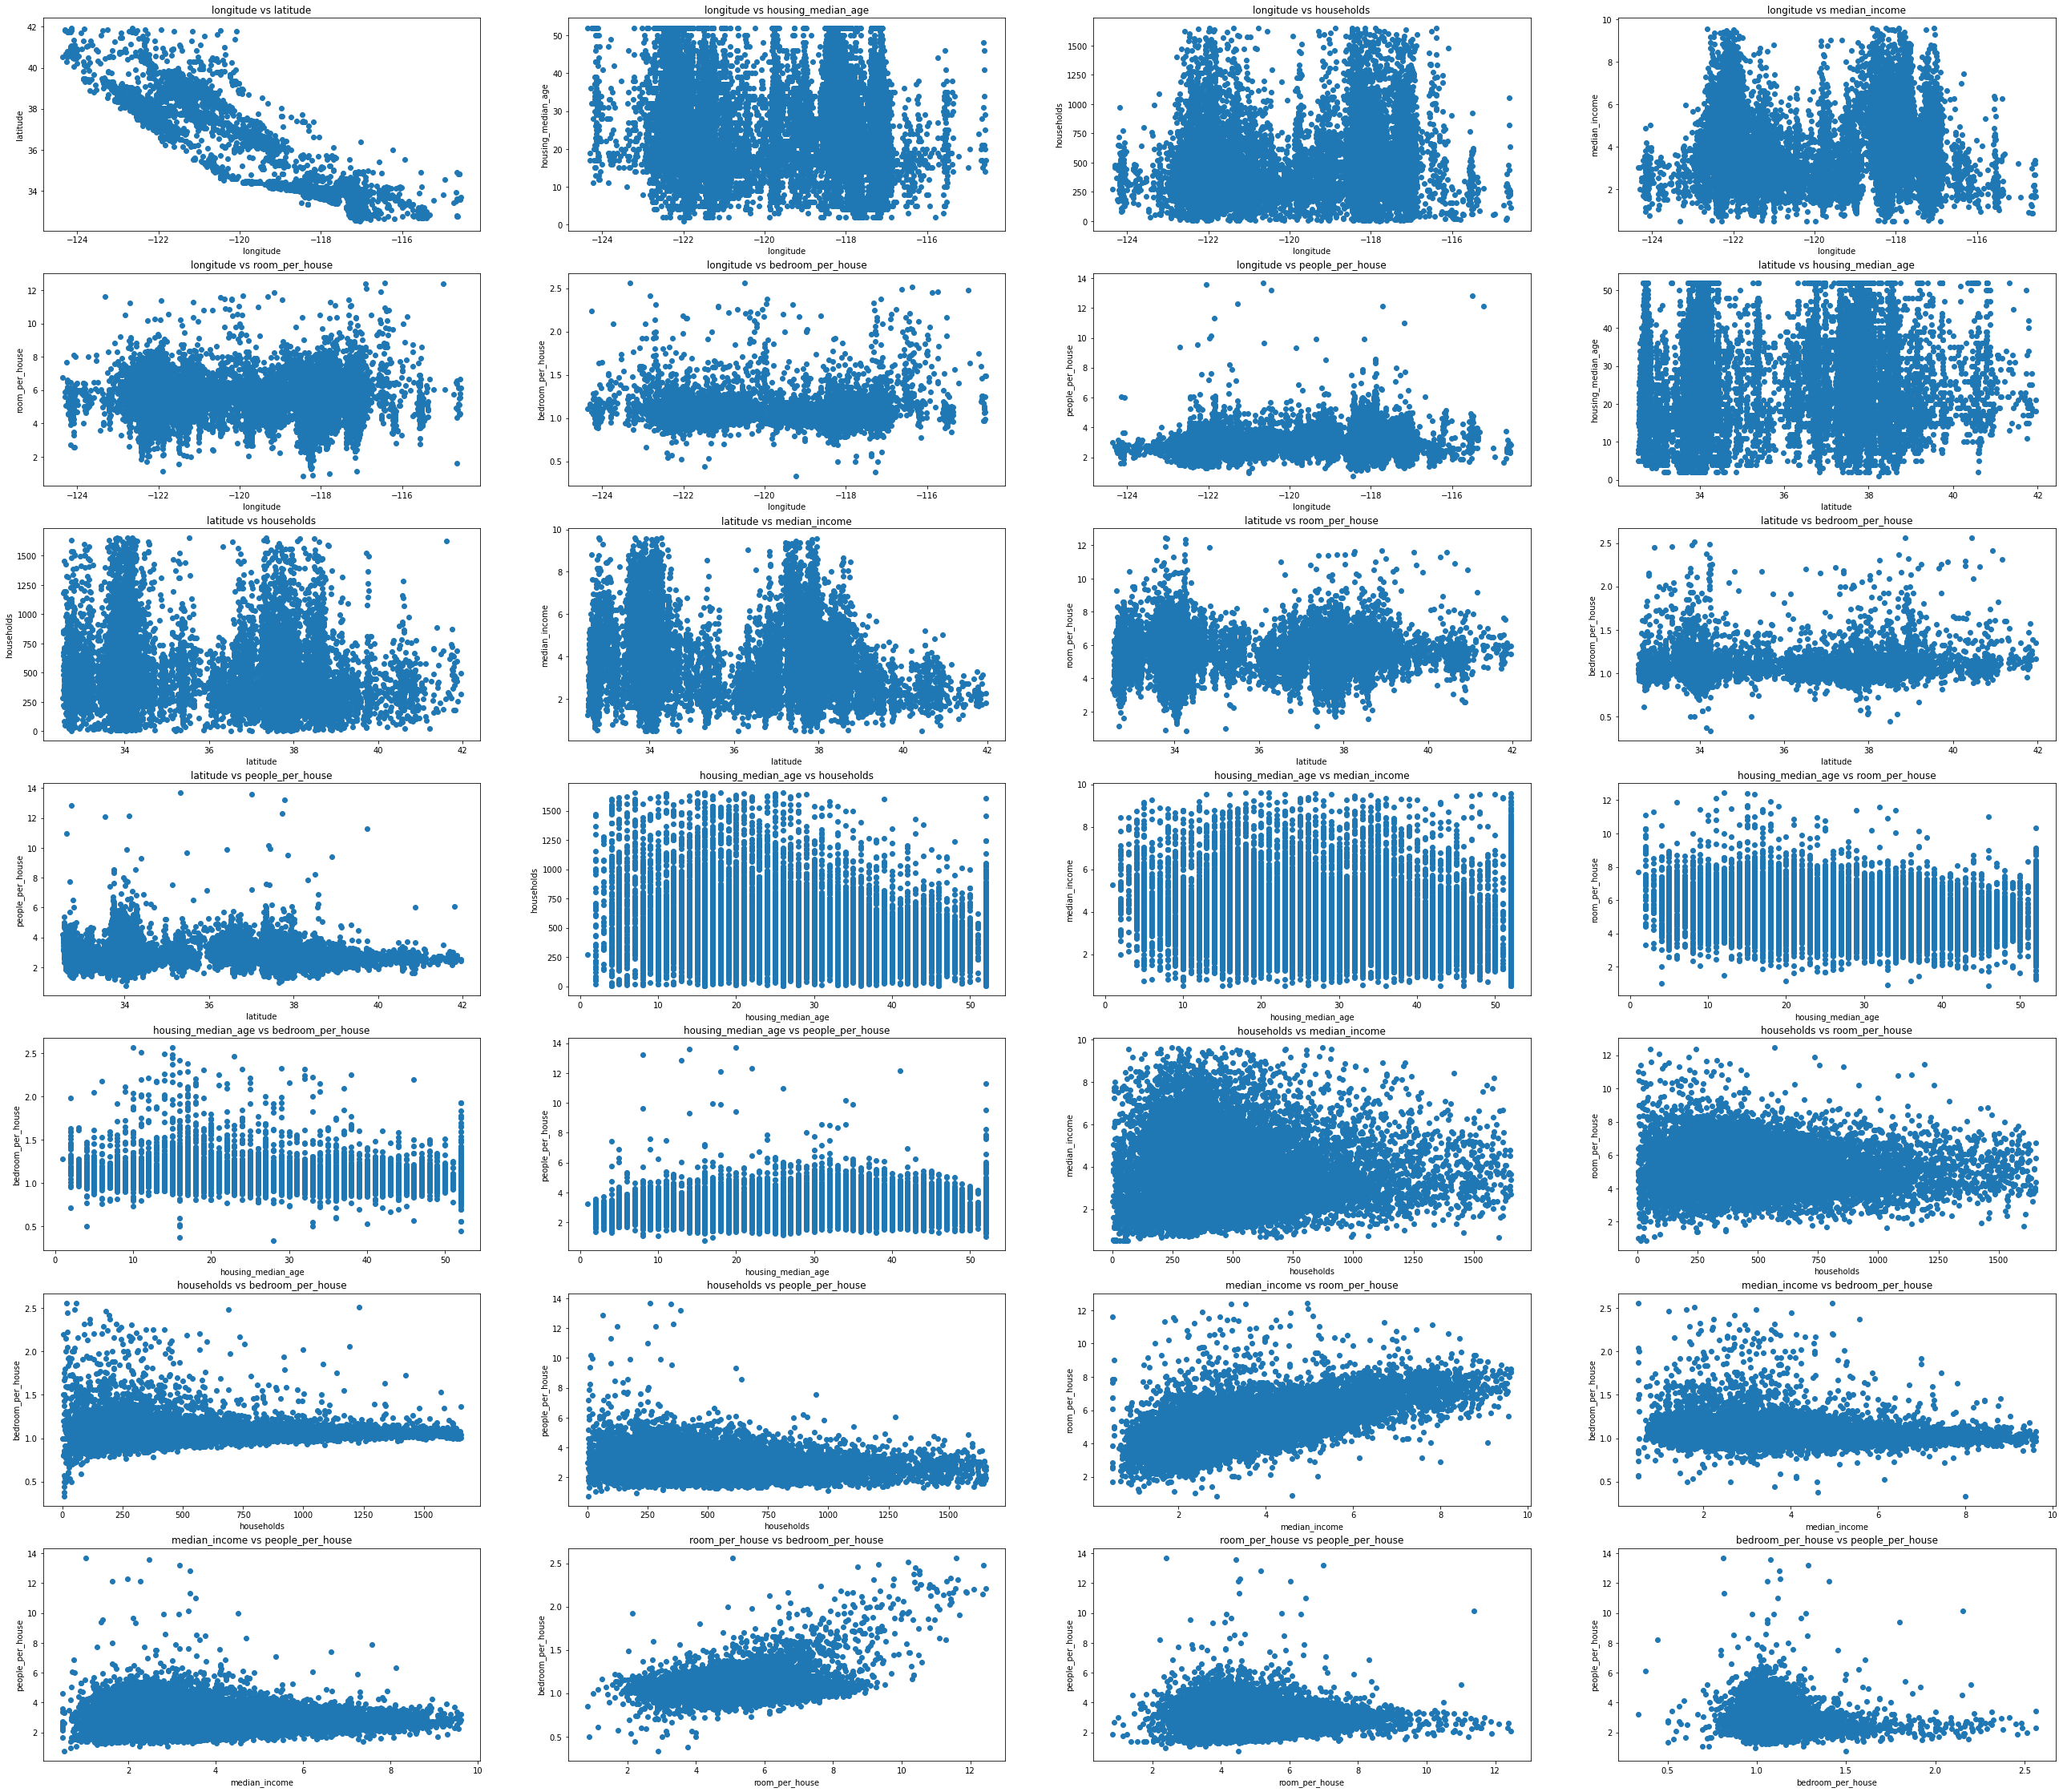

In [ ]:
plt.figure(figsize = (45,40))
count = 1
for i in range(len(X_train.columns)):
  for j in range(i+1,len(X_train.columns)):
    plt.subplot(7,4,count)
    plt.scatter(X_train[X_train.columns[i]],X_train[X_train.columns[j]])
    plt.xlabel(X_train.columns[i])
    plt.ylabel(X_train.columns[j])
    plt.title('{0} vs {1}'.format(X_train.columns[i], X_train.columns[j]))
    count +=1

We should scale the variables to check if these plots are actually a trick.

#Scale Data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.copy()) #finds transform to get mu = 0 and sigma = 1 for train data
X_train_scaled = pd.DataFrame(scaler.transform(X_train.copy()), columns = X_train.columns) #transform train data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.copy()), columns = X_train.columns) #transform using mu and sigma from above

In [ ]:
X_train_scaled.head()

,longitude,latitude,housing_median_age,households,median_income,room_per_house,bedroom_per_house,people_per_house
0,2.498204,-0.906071,-0.958267,-1.260032,-1.296673,0.738717,3.122691,-0.106222
1,2.493219,-0.929450,-1.199225,-0.873603,-0.342770,1.138857,3.152322,-0.812739
2,2.493219,-0.962182,-0.717310,-0.745974,-1.126979,0.243017,1.310158,-0.684585
3,2.488235,-0.934126,0.005563,-0.827515,-0.248606,0.451173,-0.606264,-0.154315
4,2.488235,-0.943478,-0.315714,0.569305,-0.661542,-0.542257,0.041445,-0.028747


Here are the plots after scaling:

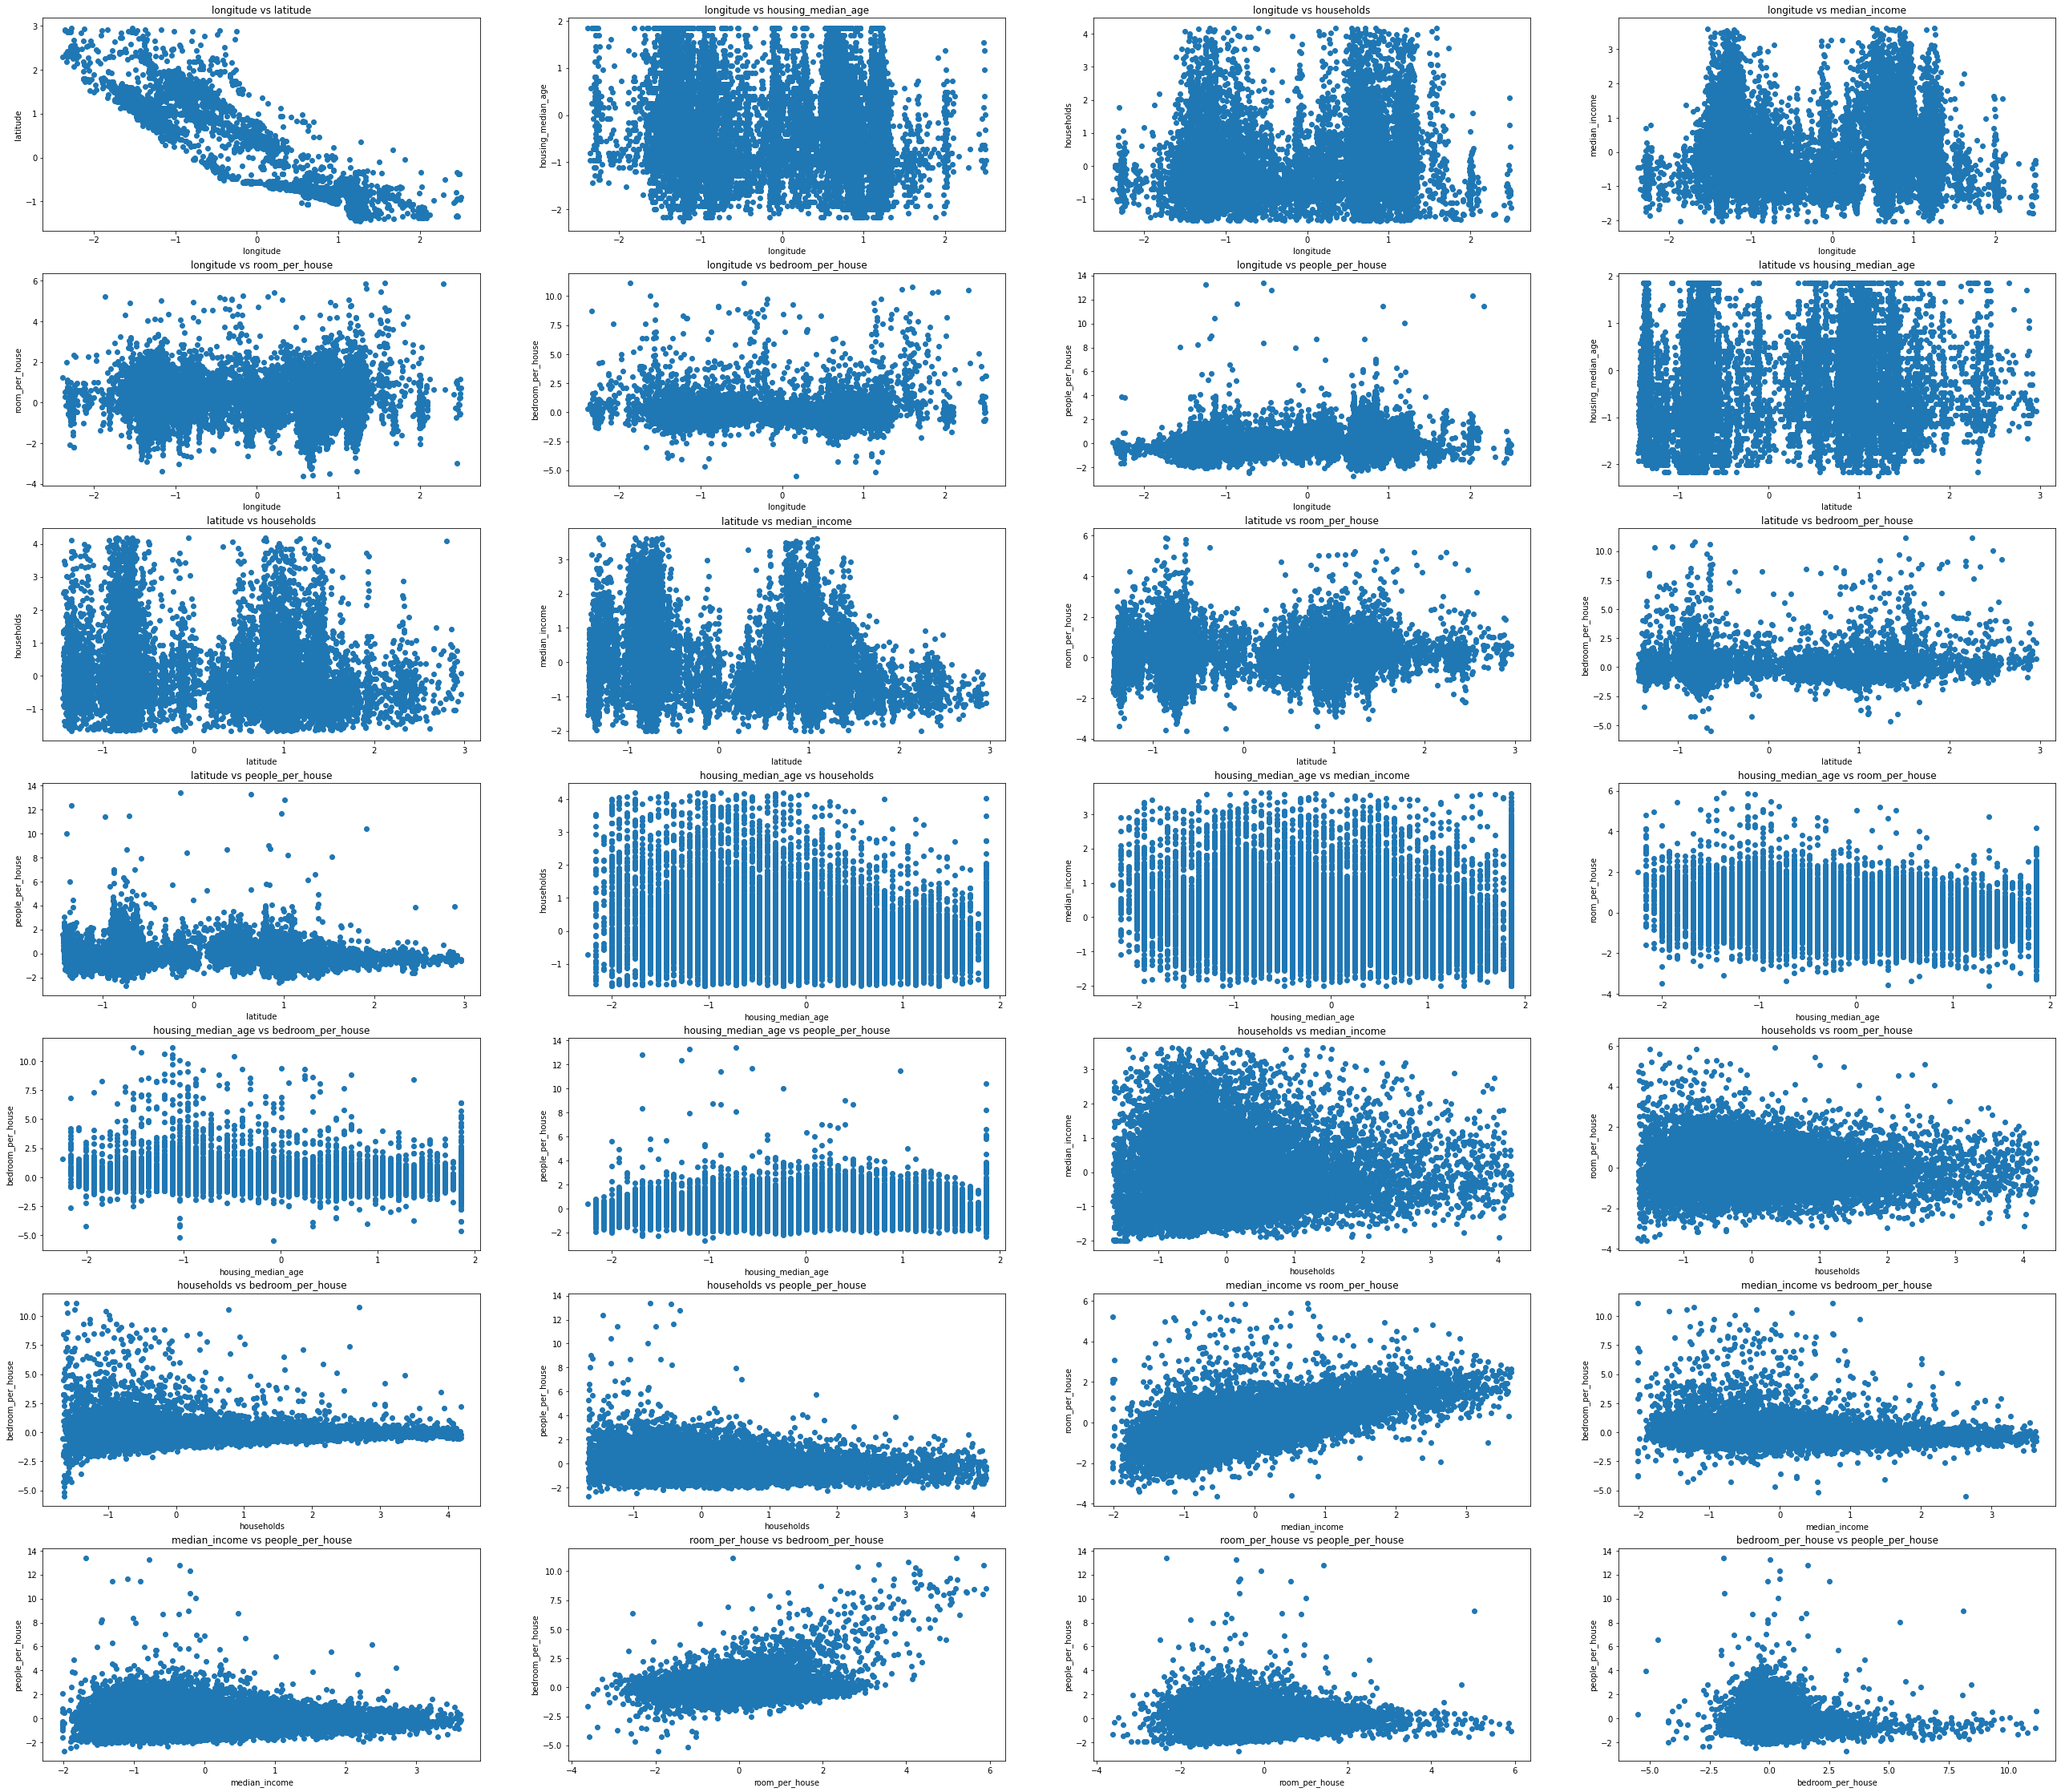

In [ ]:
plt.figure(figsize = (45,40))
count = 1
for i in range(len(X_train_scaled.columns)):
  for j in range(i+1,len(X_train_scaled.columns)):
    plt.subplot(7,4,count)
    plt.scatter(X_train_scaled[X_train_scaled.columns[i]],X_train_scaled[X_train_scaled.columns[j]])
    plt.xlabel(X_train_scaled.columns[i])
    plt.ylabel(X_train_scaled.columns[j])
    plt.title('{0} vs {1}'.format(X_train_scaled.columns[i], X_train_scaled.columns[j]))
    count +=1

It looks lke some variables still have some correlation, like income and rooms per house, longitude and latitude, and rooms per house and bedrooms per house. The only correlation that seems meaningful is longitude and latitude.

# Regression After Modifying Features


In [ ]:
reg = LinearRegression(normalize = True).fit(X_train_scaled, y_train)
prediction = reg.predict(X_test_scaled)
print(np.linalg.norm(prediction-y_test,1)/len(prediction))

52844.098382815966


In [ ]:
clf = linear_model.Lasso(alpha=1).fit(X_train_scaled,y_train)
pred_lasso = clf.predict(X_test_scaled)

print(np.linalg.norm(pred_lasso-y_test,1)/len(pred_lasso))

52843.40268306511


In [ ]:
clf = linear_model.Ridge(alpha=1).fit(X_train_scaled,y_train)
pred_ridge = clf.predict(X_test_scaled)

print(np.linalg.norm(pred_ridge-y_test,1)/len(pred_ridge))

52842.3533019581


This is worse. Let's check feature importance.

# Feature Importance

We will make a decision tree regressor, fit the data using MSE, and then check the important of each feature using the properties of the library.

In [ ]:
decTree = DecisionTreeRegressor().fit(X_train_scaled, y_train)
for i,v in enumerate(decTree.feature_importances_):
	print('Feature: %s, Score: %.5f' % (X_train_scaled.columns[i],v))

Feature: longitude, Score: 0.09906
Feature: latitude, Score: 0.09294
Feature: housing_median_age, Score: 0.06633
Feature: households, Score: 0.02954
Feature: median_income, Score: 0.47287
Feature: room_per_house, Score: 0.05736
Feature: bedroom_per_house, Score: 0.03022
Feature: people_per_house, Score: 0.15168


Removing features probably isn't a good idea.

#Using Longitude and Latitude

Let's try to use the train data to classify houses on location. The first plot we'll make is a plot of the median house value based on location.

In [ ]:
train['median_house_value'].describe()

count     16271.000000
mean     202620.401942
std      111235.718277
min       14999.000000
25%      118100.000000
50%      178100.000000
75%      259600.000000
max      500001.000000
Name: median_house_value, dtype: float64

Let's make a smaller dataframe and keep the longitude, latitude, and median house value. We'll also make a new column, which will classify houses into price ranges. If $x$ is the housing price in USD, then 
* 0 is $0 < x < 100000$ USD
* 1 is $100000 <  x < 200000$ USD
* 2 is $200000 <  x < 300000$ USD
* 3 is $300000 <  x < 400000$ USD
* 4 is $400000 <  x < 500000$ USD
* 5 is $500000 <  x < 600000$ USD


In [ ]:
#make clusters based on price
locTrain = train[['longitude', 'latitude', 'median_house_value']]
locTrain.head()

,longitude,latitude,median_house_value
2,-114.56,33.69,85700.0
3,-114.57,33.64,73400.0
4,-114.57,33.57,65500.0
5,-114.58,33.63,74000.0
6,-114.58,33.61,82400.0


In [ ]:
#set all values to be zero in column
locTrain.loc[:,'valueRange'] = np.floor(locTrain.loc[:,'median_house_value']/100000)
locTrain.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,longitude,latitude,median_house_value,valueRange
2,-114.56,33.69,85700.0,0.0
3,-114.57,33.64,73400.0,0.0
4,-114.57,33.57,65500.0,0.0
5,-114.58,33.63,74000.0,0.0
6,-114.58,33.61,82400.0,0.0


Here is the plot of the data. From looking, the most expensive houses are near the beach.

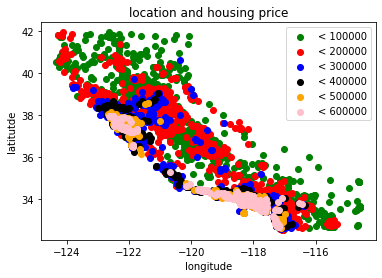

In [ ]:
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 0.0], locTrain['latitude'][locTrain['valueRange'] == 0.0], color = 'green', label = '< 100000')
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 1.0], locTrain['latitude'][locTrain['valueRange'] == 1.0], color = 'red', label = '< 200000')
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 2.0], locTrain['latitude'][locTrain['valueRange'] == 2.0], color = 'blue', label = '< 300000')
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 3.0], locTrain['latitude'][locTrain['valueRange'] == 3.0], color = 'black', label = '< 400000')
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 4.0], locTrain['latitude'][locTrain['valueRange'] == 4.0], color = 'orange', label = '< 500000')
plt.scatter(locTrain['longitude'][locTrain['valueRange'] == 5.0], locTrain['latitude'][locTrain['valueRange'] == 5.0], color = 'pink', label = '< 600000')
plt.xlabel('longitude')
plt.ylabel('latitutde')
plt.legend()
plt.title('location and housing price')
plt.show()

One way to approach this problem is by calculating the distance from the shoreline and using it as a variable. This approach isn't necessarily good because there are still some houses that are close to the shoreline and not expensive.

We'll try a different approach by using unsupervised learning with kmeans. We will make a classifier for kmeans, break the train data into clusters, and then also break the test data into clusters. Train data that is in the same cluster as the test data will be used for classification. 




## Unsupervised Learning

Let's first scale the location data using standard scaling. Then we'll make predictions using kmeans and make plots to see if our output is similar to above. 


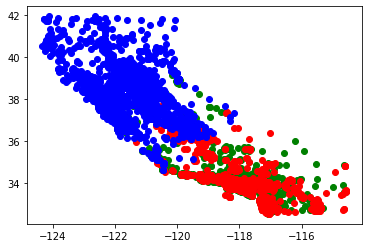

In [ ]:
#I should make a function, but I'm not testing for too long
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
plt.scatter(train['longitude'][cluster == 0.0], train['latitude'][cluster == 0.0], color = 'green')
plt.scatter(train['longitude'][cluster == 1.0], train['latitude'][cluster == 1.0], color = 'red')
plt.scatter(train['longitude'][cluster == 2.0], train['latitude'][cluster == 2.0], color = 'blue')
# plt.scatter(train['longitude'][cluster == 3.0], train['latitude'][cluster == 3.0], color = 'black')
# plt.scatter(train['longitude'][cluster == 4.0], train['latitude'][cluster == 4.0], color = 'orange')

Now append both of these columns to the train and test data.

In [ ]:
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

In [ ]:
X_train_new.head()

,longitude,latitude,housing_median_age,households,median_income,room_per_house,bedroom_per_house,people_per_house,cluster
0,2.498204,-0.906071,-0.958267,-1.260032,-1.296673,0.738717,3.122691,-0.106222,1
1,2.493219,-0.929450,-1.199225,-0.873603,-0.342770,1.138857,3.152322,-0.812739,0
2,2.493219,-0.962182,-0.717310,-0.745974,-1.126979,0.243017,1.310158,-0.684585,1
3,2.488235,-0.934126,0.005563,-0.827515,-0.248606,0.451173,-0.606264,-0.154315,1
4,2.488235,-0.943478,-0.315714,0.569305,-0.661542,-0.542257,0.041445,-0.028747,1


#New Model Using Clusters

In [ ]:
reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == 0], y_train[X_train_new['cluster'] == 0])
pred0 = reg.predict(X_test_new[X_test_new['cluster'] == 0])
print(np.linalg.norm(pred0-y_test[X_test_new['cluster'] == 0],1)/len(pred0))

60015.5862713253


In [ ]:
reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == 1], y_train[X_train_new['cluster'] == 1])
pred1 = reg.predict(X_test_new[X_test_new['cluster'] == 1])
print(np.linalg.norm(pred1-y_test[X_test_new['cluster'] == 1],1)/len(pred1))

52245.217748269446


In [ ]:
reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] ==2], y_train[X_train_new['cluster'] == 2])
pred2 = reg.predict(X_test_new[X_test_new['cluster'] == 2])
print(np.linalg.norm(pred2-y_test[X_test_new['cluster'] == 2],1)/len(pred2))

47515.87331365054


This signifigantly cuts the error. It's possible that we could make more clusters using this method to see what will happen. Let's do this below. We'll try it with $5$, $10$, $15$, $20$, $25$, and $50$ clusters to see what will happen. We'll find the MAE for each cluster and compare using a loop.

## 5 Clusters

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

In [ ]:
mae = 0
for i in range(5):
    reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 49962.5119942055


# 10 Clusters

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

In [ ]:
mae = 0
for i in range(10):
    reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 46099.08010029169


# 15 clusters

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

In [ ]:
mae = 0
for i in range(15):
    reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 45246.37452135216


# 20 clusters

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

In [ ]:
mae = 0
for i in range(20):
    reg = LinearRegression(normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 45273.791112434126


##LASSO

In [ ]:
mae = 0
for i in range(20):
    reg = linear_model.Lasso(alpha = 0.01, normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 45273.727467730394


#Ridge 

In [ ]:
mae = 0
for i in range(20):
    reg = linear_model.Ridge(alpha = 0.01, normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 45246.24222823


In [ ]:
#check rmse/R^2
res = 0
ss = 0
for i in range(20):
    reg = linear_model.Ridge(alpha = 0.01, normalize = True).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = reg.predict(X_test_new[X_test_new['cluster'] == i])
    res += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],2)**2
    ss += np.linalg.norm(pred - np.mean(y_test)*np.ones(len(pred)), 2)**2
rmse = np.sqrt(res/len(y_test))
r_squared = 1 - res/ss
print("The RMSE is:", rmse)
print("R_squared:", r_squared)

The RMSE is: 69531.73856294398
R_squared: 0.5822932147154909


At this point, it's probably best to just use ridge or LASSO since the results are really accurate, and it's very efficient to use these methods since they are computationally cheap and scale very well. 

#Other Models

From this very rough analysis, about 20 clusters seems to be right for this classifer. We'll try 55 for the larger classifers. We should really use CV, there isn't enough samples for this. The problem with using too many clusters is that we won't actually have that many samples in the cluster.

In [ ]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(X_train_scaled)
cluster = kmeans.predict(X_train_scaled)
#do with test data
cluster_test = kmeans.predict(X_test_scaled)
X_train_new = pd.concat([X_train_scaled, pd.DataFrame(cluster, columns = ['cluster'])], axis = 1)
X_test_new = pd.concat([X_test_scaled, pd.DataFrame(cluster_test, columns = ['cluster'])], axis = 1)

##K Nearest Neighbors

Using the model from before, let's try to use a nearest neighbor regressor and crossvalidate over the number of neighbors. We'll use the optimal number of clusters from above to do this.

In [ ]:
mae = 0
for i in range(25):
    knn = KNeighborsRegressor(n_neighbors = 10).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = knn.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 42734.78339999999


In [ ]:
#check rmse/R^2
res = 0
ss = 0
for i in range(25):
    knn = KNeighborsRegressor(n_neighbors = 10).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = knn.predict(X_test_new[X_test_new['cluster'] == i])
    res += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],2)**2
    ss += np.linalg.norm(pred - np.mean(y_test)*np.ones(len(pred)), 2)**2
rmse = np.sqrt(res/len(y_test))
r_squared = 1 - res/ss
print("The RMSE is:", rmse)
print("R_squared:", r_squared)

The RMSE is: 62480.267240877525
R_squared: 0.538952897511604


This is better, and it's not that much slower. Maybe this will be a viable method. 

## Random Forest

Let's try the same thing with random forest.

In [ ]:
mae = 0
for i in range(25):
    rf = RandomForestRegressor(n_estimators = 500).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = rf.predict(X_test_new[X_test_new['cluster'] == i])
    mae += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],1)
mae = mae/len(y_test)
print("The MAE is:", mae)

The MAE is: 32828.67993866666


In [ ]:
#check rmse/R^2
res = 0
ss = 0
for i in range(25):
    rf = RandomForestRegressor(n_estimators = 500).fit(X_train_new[X_train_new['cluster'] == i], y_train[X_train_new['cluster'] == i])
    pred = rf.predict(X_test_new[X_test_new['cluster'] == i])
    res += np.linalg.norm(pred-y_test[X_test_new['cluster'] == i],2)**2
    ss += np.linalg.norm(pred - np.mean(y_test)*np.ones(len(pred)), 2)**2
rmse = np.sqrt(res/len(y_test))
r_squared = 1 - res/ss
print("The RMSE is:", rmse)
print("R_squared:", r_squared)

The RMSE is: 51197.5440807439
R_squared: 0.7395917501952666


This is better. It does take a lot longer. If I have more time, I would like to use gridsearching to find the optimal parameters.

#Conclusions

Overall, my analysis is promising. I would like to try and use spectral clustering or a different clustering technique to see if I can get better results. I would like to try this technique out on a dataset where the values aren't capped and see if it generalizes. 